In [ ]:
import pandas as pd

In [ ]:
df_gpt_mini = pd.read_csv('/content/testes_gpt-4o-mini_leve1.csv')
df_gpt = pd.read_csv('/content/testes_GPT-4o_leve1.csv')
df_llama_405b_1 = pd.read_csv('/content/testes_Meta-Llama-3.1-405B-Instruct_leve1_3Q.csv')
df_llama_405b_2 = pd.read_csv('/content/testes_Meta-Llama-3.1-405B-Instruct_leve1_6Q.csv')
df_gpt_llama_1 = pd.read_csv('/content/testes_gpt-4o-and-llama3.1-405b-expansao.csv')
df_llama_validador = pd.read_csv('/content/testes_gpt-4o-and-llama3.1-405b-validador.csv')
df = pd.concat([df_gpt_mini, df_gpt, df_llama_405b_1, df_llama_405b_2,df_gpt_llama_1,df_llama_validador])
df = df.rename(columns={"0": "geracao"})
df = df.reset_index(drop=True)
df.head(5)

,geracao,model
0,To solve the problem of finding the reciprocal...,gpt-4o-mini
1,"To solve the problem, we need to find a prime ...",gpt-4o-mini
2,Let's go through the problem step-by-step with...,gpt-4o-mini
3,To solve the problem of finding the smallest p...,gpt-4o-mini
4,To solve the problem of finding the remainder ...,gpt-4o-mini


In [ ]:
df_gpt_mini_logs = pd.read_csv('/content/logs_gpt-4o-mini_leve1.csv')
df_gpt_mini_logs['model'] = 'GPT-4o-mini'

df_gpt_logs = pd.read_csv('/content/logs_GPT-4o_leve1.csv')
df_gpt_logs['model'] = 'GPT-4o'

df_llama_405b_1_logs = pd.read_csv('/content/logs_Meta-Llama-3.1-405B-Instruct_leve1_3Q.csv')
df_llama_405b_1_logs['model'] = 'Meta-Llama-3.1-405B-Instruct (3Q)'

df_llama_405b_2_logs = pd.read_csv('/content/logs_Meta-Llama-3.1-405B-Instruct_leve1_4Q.csv')
df_llama_405b_2_logs['model'] = 'Meta-Llama-3.1-405B-Instruct (4Q)'

df_gpt_llama_logs = pd.read_csv('/content/logs_gpt-4o-and-llama3.1-405b-expansao.csv')
df_gpt_llama_logs['model'] = 'GTP-MathChat-LLama-Expansao'

df_gpt_llama_validador_logs = pd.read_csv('/content/logs_gpt-4o-and-llama3.1-405b-validador.csv')
df_gpt_llama_validador_logs['model'] = 'GTP-MathChat-LLama-Validador'
# Concatenar os DataFrames
df_logs = pd.concat([df_gpt_mini_logs, df_gpt_logs, df_llama_405b_1_logs, df_llama_405b_2_logs,df_gpt_llama_logs,df_gpt_llama_validador_logs])

# Visualizar o resultado
df_logs.to_csv('logs.csv', index=False)
df_logs = df_logs.reset_index(drop=True)
df_logs.head(5)

,chat_id,chat_history,summary,cost,human_input,model
0,NaN,[{'content': 'explain the math problem solved ...,Score: 4\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
1,NaN,"[{'content': ""explain the math problem solved ...",- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
2,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
3,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
4,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini


In [ ]:
df_logs['summary'][20]

"Based on the provided explanation, I will evaluate the quality of the math question explanation.\n\n**Clarity in Formulation (CF): 5**\nThe problem is clearly presented, and the student can understand exactly what is being asked. The language is objective, and there are no ambiguities.\n\n**Relevant Context (RC): 4**\nThe problem provides a meaningful context by explaining the concept of a repeating decimal and its conversion to a fraction. However, it could be improved by providing more context about why finding the reciprocal is important or relevant.\n\n**Logical Sequence of Information (LSI): 5**\nThe information is organized logically and progressively, making it easy for the student to build the necessary reasoning to solve the question. Each step is clearly explained, and the student can follow the solution easily.\n\n**Appropriate for the Student's Knowledge Level (AL): 4**\nThe problem is suitable for beginners who have a basic understanding of fractions and decimals. However

In [ ]:
import re
def extract_and_average_scores(summary):
    if not isinstance(summary, str):
        return None  # Retorna None para valores não string

    # Procura por scores em quatro formatos possíveis
    scores = re.findall(
        r"Score:\s*(\d+)|\*\*.*?\):\s*(\d+)|(?:Clarity in Formulation|Relevant Context|Logical Sequence of Information|Appropriate for the Student's Knowledge Level|Objectivity in Expected Response)\s*\(.*?\):\s*(\d+)|I will give it a score of (\d+)",
        summary
    )

    # Filtra e converte para inteiros
    scores = [int(score) for match in scores for score in match if score]

    # Calcula a média simples dos scores
    average_score = sum(scores) / len(scores) if scores else None
    return average_score



In [ ]:
df_logs['average_score'] = df_logs['summary'].apply(extract_and_average_scores)


In [ ]:
df_logs.head(5)

,chat_id,chat_history,summary,cost,human_input,model,average_score
0,NaN,[{'content': 'explain the math problem solved ...,Score: 4\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,4.500000
1,NaN,"[{'content': ""explain the math problem solved ...",- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,8.000000
2,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,5.000000
3,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,4.666667
4,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,4.500000


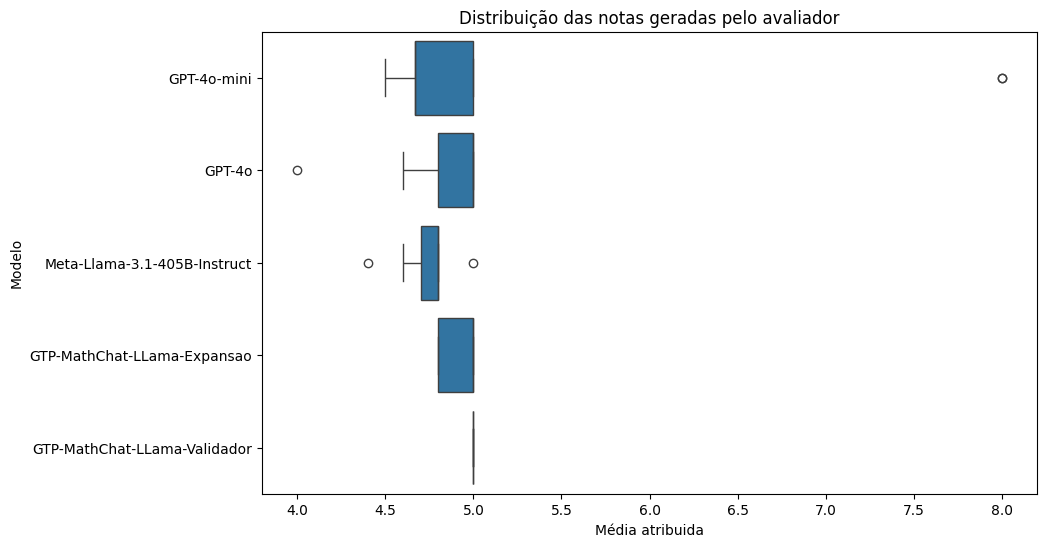

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_logs['model'] = df_logs['model'].replace(['Meta-Llama-3.1-405B-Instruct (3Q)', 'Meta-Llama-3.1-405B-Instruct (4Q)'], 'Meta-Llama-3.1-405B-Instruct')


plt.figure(figsize=(10, 6))
sns.boxplot(y='model', x='average_score', data=df_logs)  # Certifique-se de que df_logs contém os dados
plt.title('Distribuição das notas geradas pelo avaliador')
plt.ylabel('Modelo')
plt.xlabel('Média atribuida')
plt.show()

In [ ]:
df_logs['chat_history'][2]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'Bryan has some 3 cent stamps and some 4 cent stamps. What is the least number of stamps he can combine so the value of the stamps is 33 cents?\\\', "To solve the problem, we need to find the least number of 3 cent and 4 cent stamps that can be combined to make a total of 33 cents. \\\\n\\\\nLet\\\'s denote:\\\\n- \\\\\\\\( x \\\\\\\\) as the number of 3 cent stamps\\\\n- \\\\\\\\( y \\\\\\\\) as the number of 4 cent stamps\\\\n\\\\nThe equation representing the total value of the stamps is:\\\\n\\\\\\\\[ 3x + 4y = 33 \\\\\\\\]\\\\n\\\\nWe want to minimize the total number of stamps, which is \\\\\\\\( x + y \\\\\\\\).\\\\n\\\\n### Step 1: Solve for possible combinations of \\\\\\\\( x \\\\\\\\) and \\\\\\\\( y \\\\\\\\)\\\\n\\\\nWe can rearrange the equation to express \\\\\\\\( y \\\\\\\\) in terms of \\\\\\\\( x \\\\\\\\):\\\\n\\\\\\\\[ 4y = 33 - 3x \\\\\\\\]\\\\n\\\\\\\\[ y = \

In [ ]:
df_logs['chat_history'][7]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'What two-digit positive integer is one more than a multiple of 2, 3, 4, 5 and 6?\\\', "To solve the problem, we need to find a two-digit positive integer \\\\\\\\( n \\\\\\\\) such that \\\\\\\\( n - 1 \\\\\\\\) is a multiple of 2, 3, 4, 5, and 6. \\\\n\\\\nFirst, we need to find the least common multiple (LCM) of these numbers. The LCM of a set of numbers is the smallest number that is a multiple of each of the numbers in the set.\\\\n\\\\nLet\\\'s calculate the LCM of 2, 3, 4, 5, and 6 step by step.\\\\n\\\\n1. The prime factorization of each number is:\\\\n   - \\\\\\\\( 2 = 2^1 \\\\\\\\)\\\\n   - \\\\\\\\( 3 = 3^1 \\\\\\\\)\\\\n   - \\\\\\\\( 4 = 2^2 \\\\\\\\)\\\\n   - \\\\\\\\( 5 = 5^1 \\\\\\\\)\\\\n   - \\\\\\\\( 6 = 2^1 \\\\\\\\times 3^1 \\\\\\\\)\\\\n\\\\n2. To find the LCM, we take the highest power of each prime that appears in the factorizations:\\\\n   - For \\\\\\\\( 

In [ ]:
df_logs = pd.read_csv('/content/logs_GPT-4o_leve1.csv')
df_logs['chat_history'][0]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'What is the reciprocal of the common fraction form of $.\\\\\\\\overline{2}$?\\\', "The key idea to solve this problem is to convert the repeating decimal \\\\\\\\(0.\\\\\\\\overline{2}\\\\\\\\) into a fraction and then find its reciprocal.\\\\n\\\\nLet\\\'s solve it step by step:\\\\n\\\\n1. Let \\\\\\\\( x = 0.\\\\\\\\overline{2} \\\\\\\\).\\\\n2. Multiply both sides by 10 to shift the decimal point: \\\\\\\\( 10x = 2.\\\\\\\\overline{2} \\\\\\\\).\\\\n3. Subtract the original equation from this new equation to eliminate the repeating part:\\\\n   \\\\\\\\[\\\\n   10x - x = 2.\\\\\\\\overline{2} - 0.\\\\\\\\overline{2}\\\\n   \\\\\\\\]\\\\n   \\\\\\\\[\\\\n   9x = 2\\\\n   \\\\\\\\]\\\\n4. Solve for \\\\\\\\( x \\\\\\\\) by dividing both sides by 9:\\\\n   \\\\\\\\[\\\\n   x = \\\\\\\\frac{2}{9}\\\\n   \\\\\\\\]\\\\n\\\\nNow, we have the fraction form of \\\\\\\\(0.\\\\\\\\overl

In [ ]:
df_logs = pd.read_csv('/content/logs_gpt-4o-mini_leve1.csv')
df_logs['chat_history'][0]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'What is the reciprocal of the common fraction form of $.\\\\\\\\overline{2}$?\\\', "To find the reciprocal of the common fraction form of \\\\\\\\(0.\\\\\\\\overline{2}\\\\\\\\), we first need to convert \\\\\\\\(0.\\\\\\\\overline{2}\\\\\\\\) into a fraction.\\\\n\\\\nLet \\\\\\\\(x = 0.\\\\\\\\overline{2}\\\\\\\\). This means that \\\\\\\\(x = 0.22222...\\\\\\\\).\\\\n\\\\nTo eliminate the repeating decimal, we can multiply both sides of the equation by 10:\\\\n\\\\n\\\\\\\\[\\\\n10x = 2.22222...\\\\n\\\\\\\\]\\\\n\\\\nNow, we can subtract the original equation from this new equation:\\\\n\\\\n\\\\\\\\[\\\\n10x - x = 2.22222... - 0.22222...\\\\n\\\\\\\\]\\\\n\\\\nThis simplifies to:\\\\n\\\\n\\\\\\\\[\\\\n9x = 2\\\\n\\\\\\\\]\\\\n\\\\nNow, we can solve for \\\\\\\\(x\\\\\\\\):\\\\n\\\\n\\\\\\\\[\\\\nx = \\\\\\\\frac{2}{9}\\\\n\\\\\\\\]\\\\n\\\\nNow that we have the common fracti

In [ ]:
df_logs = pd.read_csv('/content/logs_Meta-Llama-3.1-405B-Instruct_leve1_3Q.csv')
df_logs['chat_history'][0]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'What is the reciprocal of the common fraction form of $.\\\\\\\\overline{2}$?\\\', "## Step 1: Understand the problem\\\\nWe are given a repeating decimal $.\\\\\\\\overline{2}$ and asked to find the reciprocal of its common fraction form.\\\\n\\\\n## Step 2: Convert the repeating decimal to a fraction\\\\nLet\\\'s denote the repeating decimal as x. We can write it as:\\\\nx = 0.222222...\\\\n\\\\n## Step 3: Multiply the decimal by 10 to shift the repeating part\\\\n10x = 2.222222...\\\\n\\\\n## Step 4: Subtract the original decimal from the shifted decimal\\\\n10x - x = 2.222222... - 0.222222...\\\\nThis simplifies to:\\\\n9x = 2\\\\n\\\\n## Step 5: Solve for x\\\\nDivide both sides by 9:\\\\nx = 2/9\\\\n\\\\n## Step 6: Find the reciprocal of the fraction\\\\nThe reciprocal of 2/9 is 9/2.\\\\n\\\\n```python\\\\nfrom fractions import Fraction\\\\n\\\\n# Define the fraction\\\\nfra

In [ ]:
df['geracao'][20]

"The math problem is to find the reciprocal of the common fraction form of the repeating decimal 0.222222....\n\nHere's the step-by-step solution:\n\n**Step 1: Understand the problem**\nThe problem asks us to find the reciprocal of the common fraction form of the repeating decimal 0.222222....\n\n**Step 2: Convert the repeating decimal to a fraction**\nLet's denote the repeating decimal as x. We can write it as x = 0.222222....\n\n**Step 3: Multiply the decimal by 10 to shift the repeating part**\nMultiplying x by 10 shifts the repeating part one digit to the left, resulting in 10x = 2.222222....\n\n**Step 4: Subtract the original decimal from the shifted decimal**\nSubtracting x from 10x eliminates the repeating part: 10x - x = 2.222222... - 0.222222....\nThis simplifies to 9x = 2.\n\n**Step 5: Solve for x**\nDividing both sides of the equation by 9 gives x = 2/9.\n\n**Step 6: Find the reciprocal of the fraction**\nThe reciprocal of a fraction is obtained by swapping the numerator and

In [ ]:
df['geracao'][0]

"To solve the problem of finding the reciprocal of the common fraction form of \\(0.\\overline{2}\\), we can follow these steps:\n\n1. **Understanding the Decimal**: The notation \\(0.\\overline{2}\\) represents a repeating decimal, which means it is equal to \\(0.22222...\\) where the digit '2' repeats indefinitely.\n\n2. **Setting Up an Equation**: We can let \\(x\\) represent the repeating decimal:\n   \\[\n   x = 0.\\overline{2}\n   \\]\n   This means:\n   \\[\n   x = 0.22222...\n   \\]\n\n3. **Eliminating the Repeating Part**: To convert this repeating decimal into a fraction, we can multiply both sides of the equation by 10. This shifts the decimal point one place to the right:\n   \\[\n   10x = 2.22222...\n   \\]\n\n4. **Subtracting the Original Equation**: Now, we can subtract the original equation from this new equation to eliminate the repeating part:\n   \\[\n   10x - x = 2.22222... - 0.22222...\n   \\]\n   This simplifies to:\n   \\[\n   9x = 2\n   \\]\n\n5. **Solving for \

In [ ]:
import kagglehub
import os
import json
from pathlib import Path
import pandas as pd


problems = []
def carregar_problemas(paths):
    for path in paths:
        for p in Path(path).rglob("*.json"):
            try:
                with open(p) as f:
                    problems.append(json.load(f))
            except Exception as e:
                print(f"Erro ao carregar o arquivo {p}: {e}")

paths = [
'/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/number_theory/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/geometry/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/intermediate_algebra/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/precalculus/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/prealgebra/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/counting_and_probability/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/train/algebra/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/number_theory/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/geometry/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/intermediate_algebra/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/precalculus/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/prealgebra/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/counting_and_probability/',
 '/root/.cache/kagglehub/datasets/mathurinache/math-dataset/versions/1/MATH/test/algebra/'
]
path = kagglehub.dataset_download("mathurinache/math-dataset")

carregar_problemas(paths)


print(f"Total de problemas carregados: {len(problems)}")

df = pd.DataFrame(problems)
df

100%|██████████| 7.07M/7.07M [00:00<00:00, 81.8MB/s]

Extracting files...


Total de problemas carregados: 12500


,problem,level,type,solution
0,How many unordered pairs of prime numbers have...,Level 2,Number Theory,We must check whether or not the difference be...
1,Compute $10^{-1}\pmod{1001}$. Express your ans...,Level 4,Number Theory,"Notice that $1001=10\cdot 100+1$. Therefore, $..."
2,What is the smallest positive integer $n$ such...,Level 3,Number Theory,"If $2n$ is a perfect square, then $n$ must be ..."
3,What is the sum of the digits of the base $7$ ...,Level 3,Number Theory,To find the base $7$ representation of $777_{1...
4,"The number of solutions of $2^{2x}-3^{2y}=55$,...",Level 5,Number Theory,Let $a = 2^x$ and $b = 3^y$. Substituting thes...
...,...,...,...,...
12495,"If $f(x)=4x^3+1$, find $f^{-1}(33)$.",Level 3,Algebra,If we substitute $f^{-1}(x)$ into our expressi...
12496,Given that $-4$ is a solution to $x^2 + bx -36...,Level 3,Algebra,The product of the roots of this quadratic is ...
12497,What is the slope of the line containing the m...,Level 3,Algebra,We know that the midpoint of a line segment wi...
12498,"Recently, Frank took a one-hundred question ap...",Level 3,Algebra,Let the number of questions Frank answered cor...


In [ ]:
teste = pd.read_csv("/content/logs.csv")
teste

,chat_id,chat_history,summary,cost,human_input,model
0,NaN,[{'content': 'explain the math problem solved ...,Score: 4\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
1,NaN,"[{'content': ""explain the math problem solved ...",- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
2,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
3,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
4,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
5,NaN,"[{'content': ""explain the math problem solved ...",Score Breakdown:\n\n- Clarity in Formulation (...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
6,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
7,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
8,NaN,"[{'content': ""explain the math problem solved ...",Clarity in Formulation (CF): 5\nThe question i...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini
9,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini


In [ ]:

teste['chat_history'][0]

'[{\'content\': \'explain the math problem solved in this conversation\\n      --------------\\n      [\\\'What is the reciprocal of the common fraction form of $.\\\\\\\\overline{2}$?\\\', "To find the reciprocal of the common fraction form of \\\\\\\\(0.\\\\\\\\overline{2}\\\\\\\\), we first need to convert \\\\\\\\(0.\\\\\\\\overline{2}\\\\\\\\) into a fraction.\\\\n\\\\nLet \\\\\\\\(x = 0.\\\\\\\\overline{2}\\\\\\\\). This means that \\\\\\\\(x = 0.22222...\\\\\\\\).\\\\n\\\\nTo eliminate the repeating decimal, we can multiply both sides of the equation by 10:\\\\n\\\\n\\\\\\\\[\\\\n10x = 2.22222...\\\\n\\\\\\\\]\\\\n\\\\nNow, we can subtract the original equation from this new equation:\\\\n\\\\n\\\\\\\\[\\\\n10x - x = 2.22222... - 0.22222...\\\\n\\\\\\\\]\\\\n\\\\nThis simplifies to:\\\\n\\\\n\\\\\\\\[\\\\n9x = 2\\\\n\\\\\\\\]\\\\n\\\\nNow, we can solve for \\\\\\\\(x\\\\\\\\):\\\\n\\\\n\\\\\\\\[\\\\nx = \\\\\\\\frac{2}{9}\\\\n\\\\\\\\]\\\\n\\\\nNow that we have the common fracti

In [ ]:
import ast
teste['chat_history'] = teste['chat_history'].apply(ast.literal_eval)

# Calcular o número de interações
teste['interaction_count'] = teste['chat_history'].apply(len)
teste

,chat_id,chat_history,summary,cost,human_input,model,interaction_count
0,NaN,[{'content': 'explain the math problem solved ...,Score: 4\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
1,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
2,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,5
3,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
4,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
5,NaN,[{'content': 'explain the math problem solved ...,Score Breakdown:\n\n- Clarity in Formulation (...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
6,NaN,[{'content': 'explain the math problem solved ...,- Clarity in Formulation (CF): 5 - The questio...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
7,NaN,[{'content': 'explain the math problem solved ...,Score: 5\n\nReasoning:\n- Clarity in Formulati...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,5
8,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5\nThe question i...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3
9,NaN,[{'content': 'explain the math problem solved ...,Clarity in Formulation (CF): 5 - The question ...,{'usage_including_cached_inference': {'total_c...,[],GPT-4o-mini,3


In [ ]:
teste['model'] = teste['model'].replace(['Meta-Llama-3.1-405B-Instruct (3Q)', 'Meta-Llama-3.1-405B-Instruct (4Q)'], 'Meta-Llama-3.1-405B-Instruct')

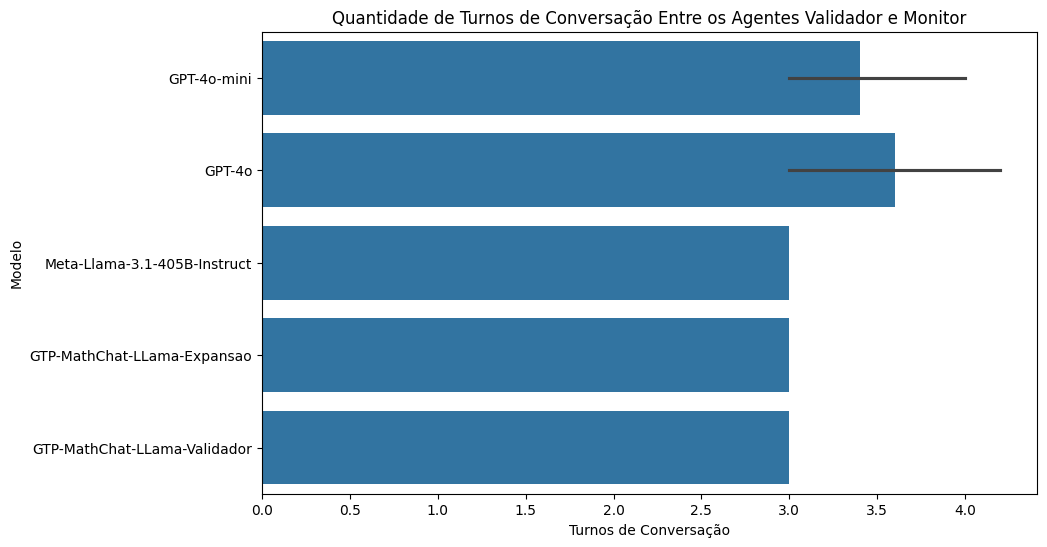

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=teste,y='model',x='interaction_count')
plt.title('Quantidade de Turnos de Conversação Entre os Agentes Validador e Monitor')
plt.ylabel('Modelo')
plt.xlabel('Turnos de Conversação')
plt.show()